# Estudo sobre a evolução do virus Covid-19 (CORONAVÍRUS)

> [Autor](https://www.linkedin.com/in/alberto-oliveira-barbosa/)

# Fontes dos dados
> [Repositório Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19)  
> [Daily reports](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports)  
> [Time Series](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)


# Avisos

- Os dados das fontes são atualizados no final do dia, por isso dependendo do horário que o notebook for usado, ele pode ou não, conter os dados mais atuais do repositório.  
- Como os dados foram disponibilizados na internet de forma **pública**, o autor não se responsabiliza pela manutenção dos repositórios com os dados nem a exatidão deles com outras fontes, sendo estas, oficiais ou não.  
- Este é um projeto desenvolvido para **fins de estudo**, e tal qual, não tem por objetivo servir de guia ou referência oficial sobre o caso.

# Import de bibliotecas e configurações do notebook

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configuração global dos gráficos
plt.rcParams['figure.figsize'] = (12,7)

# Funções:

In [270]:
# Verifica se a ultima data é válida
# caso o campo de data esteja em branco, ele pega a coluna anterior a ela

def valida_dados(dados, tipo_dataset):
    
    coluna = -1
    data_atualizada = dados.columns[coluna]

    while (dados[data_atualizada].isna().mean() == 1):
        coluna = coluna - 1
        data_atualizada = dados.columns[coluna]

    print('\n', tipo_dataset)
    print('Ultima coluna do dataset: ', dados.columns[-1])
    print('Ultima data com valores válidos: ',data_atualizada)
    return data_atualizada

In [271]:
def plot_total_casos_pais(dados, pais, titulo=None, data_inicial = None, data_final = None):
    dados.groupby('Country/Region').sum().loc[pais][2:][data_inicial:data_final].plot()
    plt.title(titulo, fontsize=18)
    plt.xlabel('Data  (formato: MES/DIA/ANO)')
    plt.ylabel('Total de Casos')
    plt.show()

In [272]:
def plot_novos_casos_pais(dados, pais, titulo=None, data_inicial = None, data_final = None):
    dados.groupby('Country/Region').sum().loc[pais][2:][data_inicial:data_final].diff().plot()
    plt.title(titulo, fontsize=18)
    plt.xlabel('Data  (formato: MES/DIA/ANO)')
    plt.ylabel('Total de Casos')
    plt.show()

---

# Carga e validação dos dados

In [273]:
casos_confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
mortes_confirmadas = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
casos_recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [274]:
# valida os dados que serão usados nessa analise
data_atual_confirmados = valida_dados(casos_confirmados, 'Dataset de Casos Confirmados')
data_atual_mortes = valida_dados(mortes_confirmadas, 'Dataset de Mortes Confirmadas')
data_atual_recuperados = valida_dados(casos_recuperados, 'Dataset de Casos Recuperados')


 Dataset de Casos Confirmados
Ultima coluna do dataset:  3/14/20
Ultima data com valores válidos:  3/14/20

 Dataset de Mortes Confirmadas
Ultima coluna do dataset:  3/14/20
Ultima data com valores válidos:  3/14/20

 Dataset de Casos Recuperados
Ultima coluna do dataset:  3/14/20
Ultima data com valores válidos:  3/14/20


# Dados Sobre Casos Confirmados
## Descrições estatísticas e informações sobre os dados

In [275]:
# primeros registros
casos_confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [276]:
dados.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,...,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,32.472246,-38.240308,1.255656,1.477376,2.128959,3.244344,4.791855,6.622172,12.619910,13.950226,...,221.452489,230.280543,239.414027,248.404977,256.925339,268.307692,284.762443,290.368778,328.490950,353.171946
std,18.243160,80.488626,21.171051,21.257000,26.477289,36.865436,51.533686,69.443788,170.220759,171.323903,...,3231.736307,3245.454795,3259.270219,3272.375630,3287.815469,3300.662870,3327.040627,3334.956867,3408.758787,3472.648781
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.517325,-94.614125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.194900,-75.247900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,42.328900,18.981425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,3.000000,4.000000,6.000000,7.000000,8.750000,11.750000,17.000000,25.750000,30.750000
max,64.963100,174.886000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67466.000000,67592.000000,67666.000000,67707.000000,67743.000000,67760.000000,67773.000000,67781.000000,67786.000000,67790.000000


In [277]:
casos_confirmados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 57 columns):
Province/State    307 non-null object
Country/Region    442 non-null object
Lat               442 non-null float64
Long              442 non-null float64
1/22/20           442 non-null int64
1/23/20           442 non-null int64
1/24/20           442 non-null int64
1/25/20           442 non-null int64
1/26/20           442 non-null int64
1/27/20           442 non-null int64
1/28/20           442 non-null int64
1/29/20           442 non-null int64
1/30/20           442 non-null int64
1/31/20           442 non-null int64
2/1/20            442 non-null int64
2/2/20            442 non-null int64
2/3/20            442 non-null int64
2/4/20            442 non-null int64
2/5/20            442 non-null int64
2/6/20            442 non-null int64
2/7/20            442 non-null int64
2/8/20            442 non-null int64
2/9/20            442 non-null int64
2/10/20           442 non-null int64
2

In [278]:
casos_confirmados.shape

(442, 57)

In [279]:
# nome das colunas
casos_confirmados.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20'],
      dtype='object')

In [280]:
# Verifica a porcentagem de valores faltantes
casos_confirmados.isna().mean() * 100

Province/State    30.542986
Country/Region     0.000000
Lat                0.000000
Long               0.000000
1/22/20            0.000000
1/23/20            0.000000
1/24/20            0.000000
1/25/20            0.000000
1/26/20            0.000000
1/27/20            0.000000
1/28/20            0.000000
1/29/20            0.000000
1/30/20            0.000000
1/31/20            0.000000
2/1/20             0.000000
2/2/20             0.000000
2/3/20             0.000000
2/4/20             0.000000
2/5/20             0.000000
2/6/20             0.000000
2/7/20             0.000000
2/8/20             0.000000
2/9/20             0.000000
2/10/20            0.000000
2/11/20            0.000000
2/12/20            0.000000
2/13/20            0.000000
2/14/20            0.000000
2/15/20            0.000000
2/16/20            0.000000
2/17/20            0.000000
2/18/20            0.000000
2/19/20            0.000000
2/20/20            0.000000
2/21/20            0.000000
2/22/20            0

---

Podemos ver que o dataset é dividido em:  
- Province/State: Dados com a informação da provincia ou estado que foi confirmado o caso.
- Country/Region: País onde foi confirmado o caso.
- Lat: Dados de Latitude.
- Long: Dados de Longitude.
- Colunas com datas: Total Acumulado de casos em cada observação.


Os dados estão dispostos de modo que cada coluna após longitude representa uma data que foi contabilizado o acumulado dos casos.  
Como a coluna que representa os estados está com 30.54% de seus dados faltantes (até a data desta análise - 15/03/20) e cada país pode ou não especificar em que região o caso foi confirmado, ela não será considerada para a análise.

## Visualização de Gráficos

## Evolução de total de casos

In [281]:
# paises com casos
print('Total de países com casos confirmados de acordo com o dataset:',casos_confirmados['Country/Region'].nunique())
print('\nLista de países com casos confirmados de acordo com o dataset:\n',casos_confirmados['Country/Region'].unique())

Total de países com casos confirmados de acordo com o dataset: 143

Lista de países com casos confirmados de acordo com o dataset:
 ['Thailand' 'Japan' 'Singapore' 'Nepal' 'Malaysia' 'Canada' 'Australia'
 'Cambodia' 'Sri Lanka' 'Germany' 'Finland' 'United Arab Emirates'
 'Philippines' 'India' 'Italy' 'Sweden' 'Spain' 'Belgium' 'Egypt'
 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait' 'Algeria'
 'Croatia' 'Switzerland' 'Austria' 'Israel' 'Pakistan' 'Brazil' 'Georgia'
 'Greece' 'North Macedonia' 'Norway' 'Romania' 'Estonia' 'Netherlands'
 'San Marino' 'Belarus' 'Iceland' 'Lithuania' 'Mexico' 'New Zealand'
 'Nigeria' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador' 'Azerbaijan'
 'Armenia' 'Dominican Republic' 'Indonesia' 'Portugal' 'Andorra' 'Latvia'
 'Morocco' 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine'
 'Hungary' 'Liechtenstein' 'Poland' 'Tunisia' 'Bosnia and Herzegovina'
 'Slovenia' 'South Africa' 'Bhutan' 'Cameroon' 'Colombia' 'Costa Rica'
 'Peru' 'Serbia'

## Top 10 Países com mais casos confirmados

In [282]:
top10 = casos_confirmados.groupby('Country/Region')[data_atual_confirmados].sum().sort_values(ascending=False)[:10].index

print('Total de casos acumulados:\n\n',casos_confirmados.groupby('Country/Region')[data_atual_confirmados].sum().sort_values(ascending=False).head(10))

Total de casos acumulados:

 Country/Region
China             80977
Italy             21157
Iran              12729
Korea, South       8086
Spain              6391
Germany            4585
France             4480
US                 2727
Switzerland        1359
United Kingdom     1143
Name: 3/14/20, dtype: int64


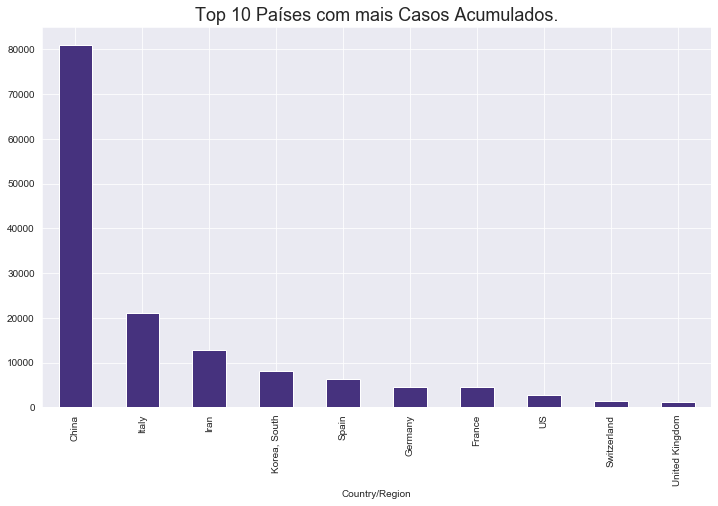

In [283]:
casos_confirmados.groupby('Country/Region')[data_atual_confirmados].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Países com mais Casos Acumulados.', fontsize=18)
plt.show()

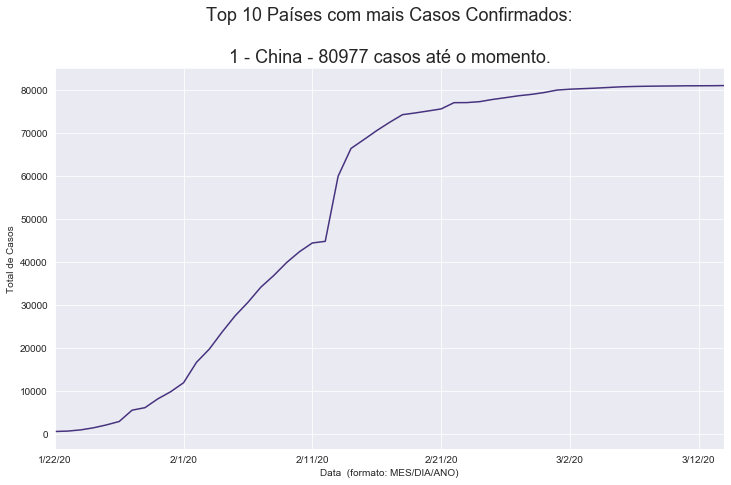

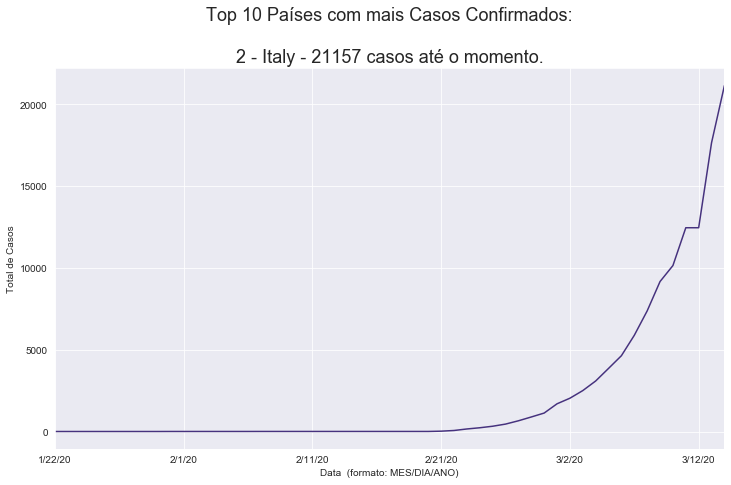

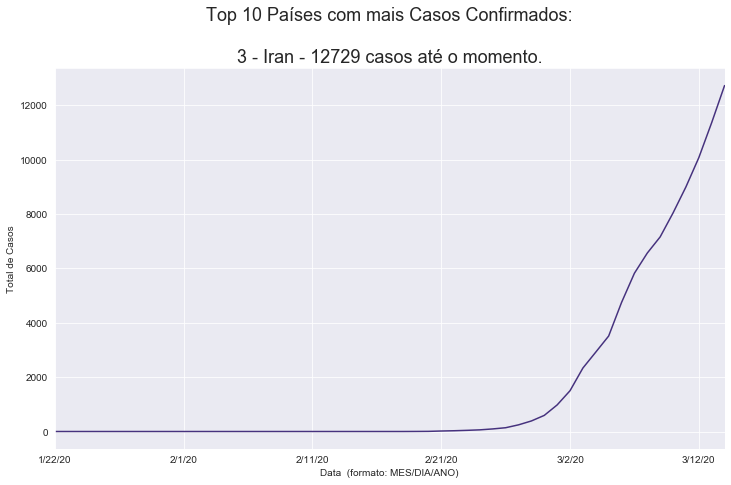

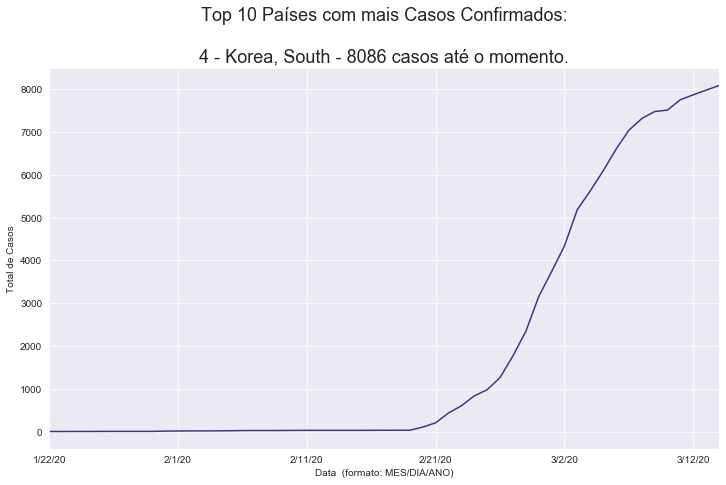

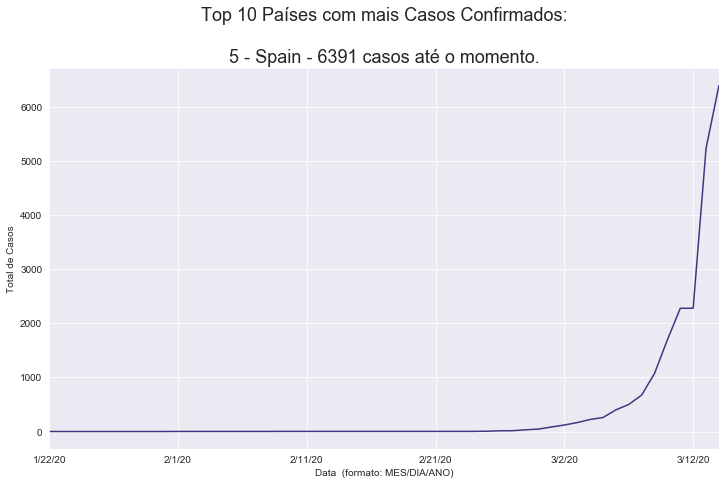

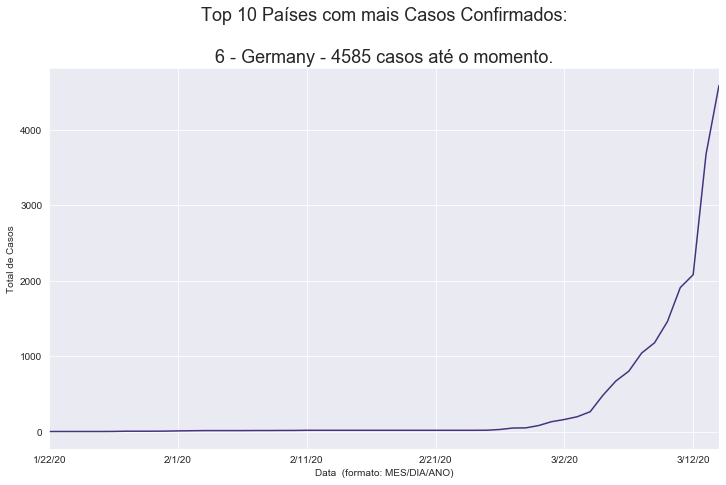

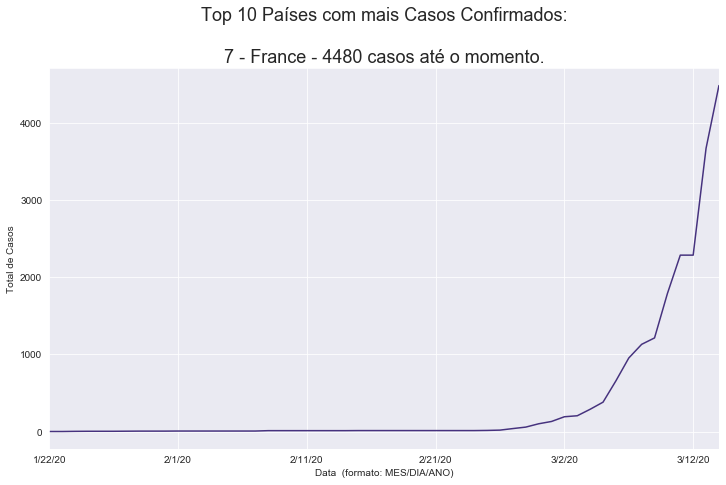

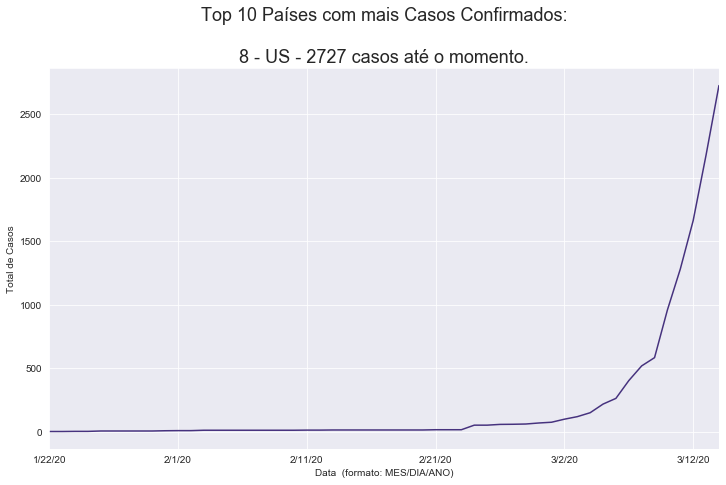

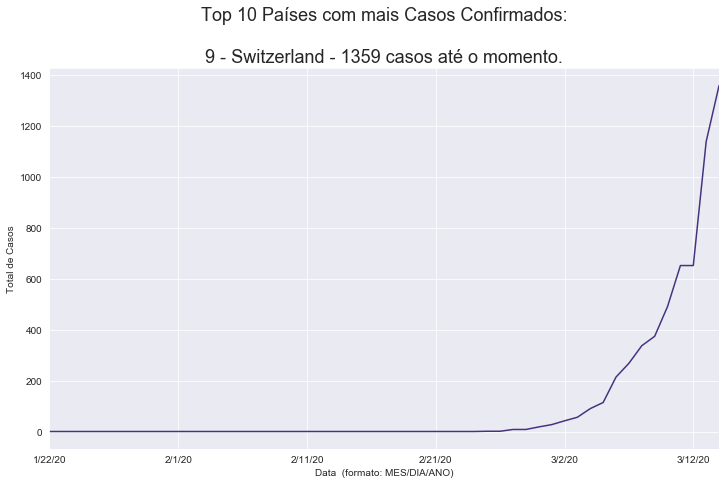

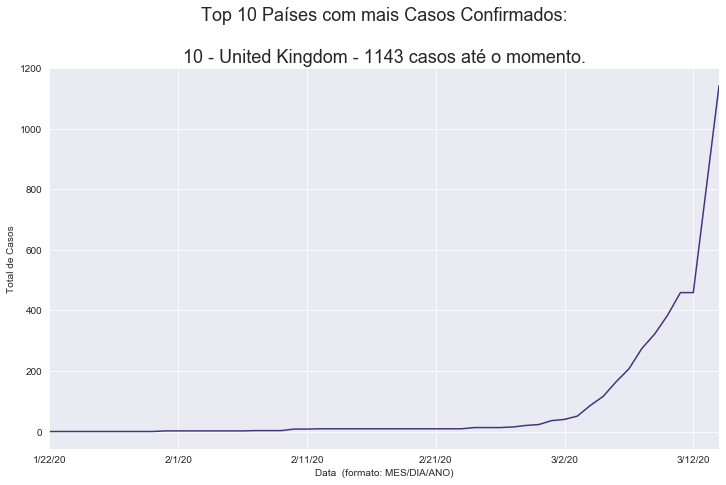

In [284]:
# Plota os graficos de cada país no top 10
for posicao, i in enumerate(top10):
    total = casos_confirmados.groupby('Country/Region')[data_atual_confirmados].sum().loc[i]
    plot_total_casos_pais(casos_confirmados, 
                          i,
                          'Top 10 Países com mais Casos Confirmados:\n\n' 
                          + str(posicao+1) 
                          + ' - ' + str(i)
                          + ' - ' + str(total) + ' casos até o momento.',
                          data_final=data_atual_confirmados)


---


Como essa é uma visualização dos dados acumulados, ela pode não ser tão intuitiva para verificar a real proporção da propagação do virus, por esse motivo a proxima visão será de novos casos confirmados.

# Distribuição dos novos casos ao longo do tempo.

  Como o dataset nos proporciona uma visão acumulada dos dados, a regra utilizada para o calculo será a diferença entre a data posterior e a data anterior observada:
- Data posteriror - Data anterior = Quantidade de casos novos

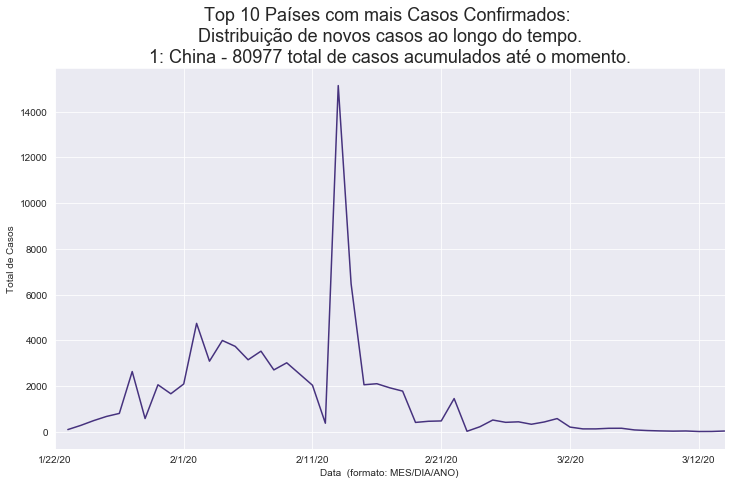

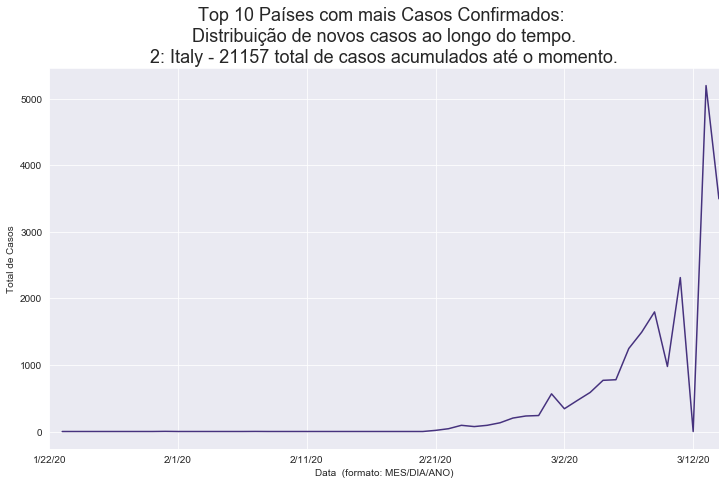

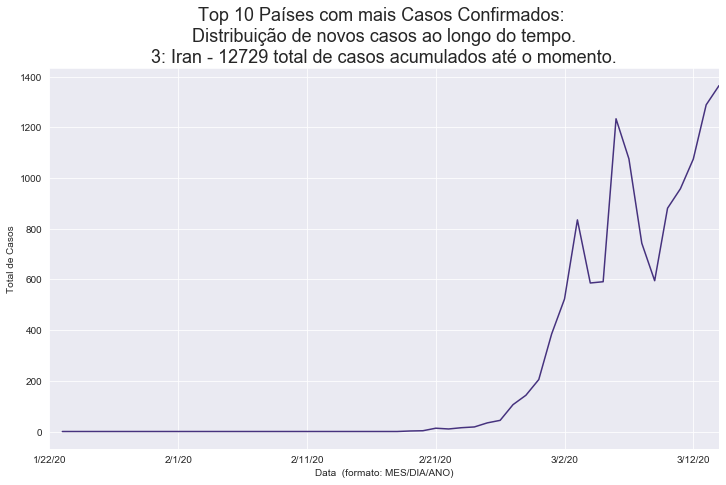

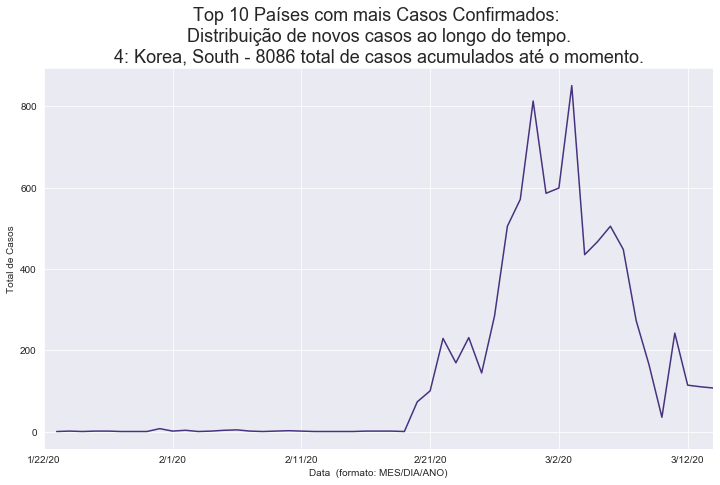

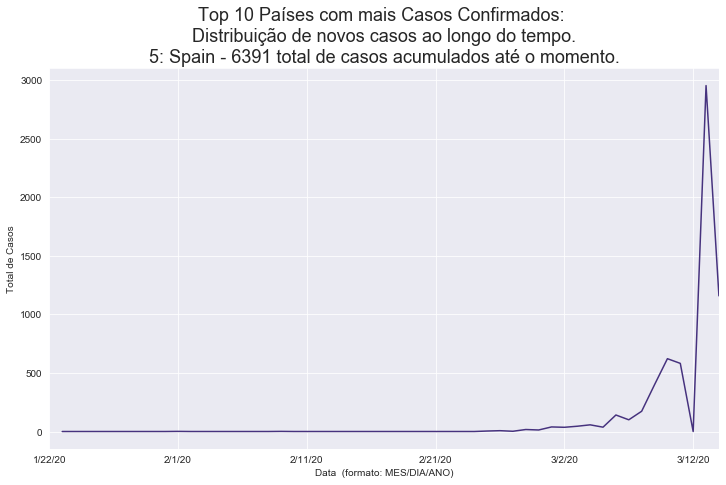

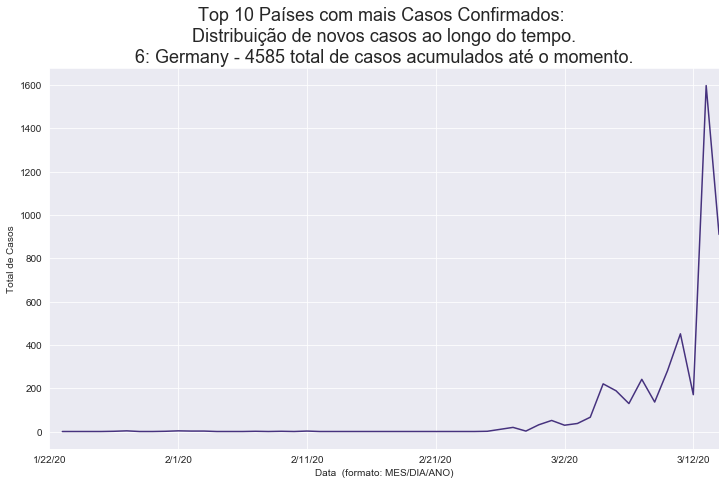

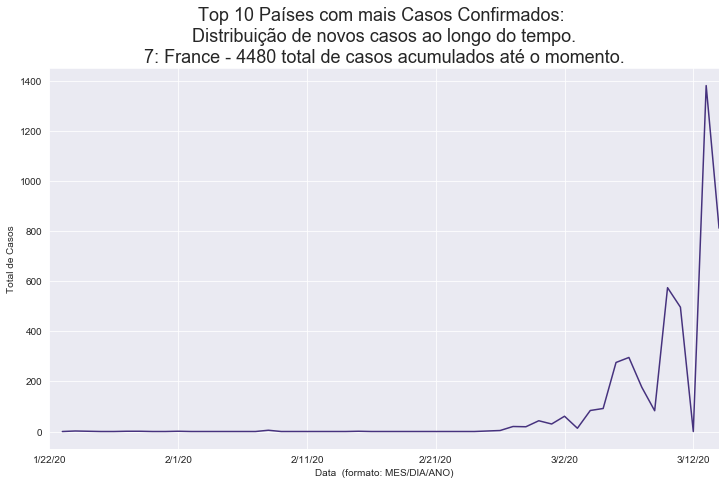

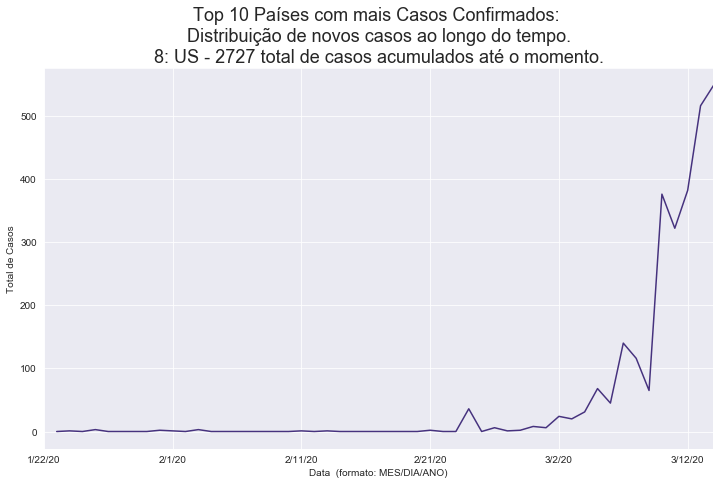

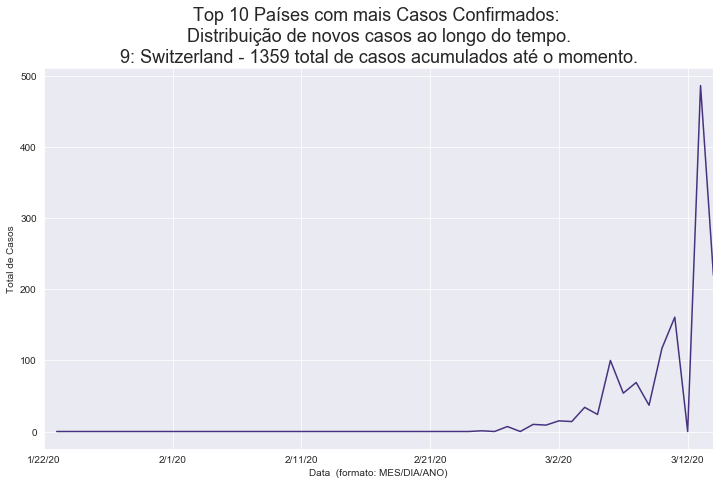

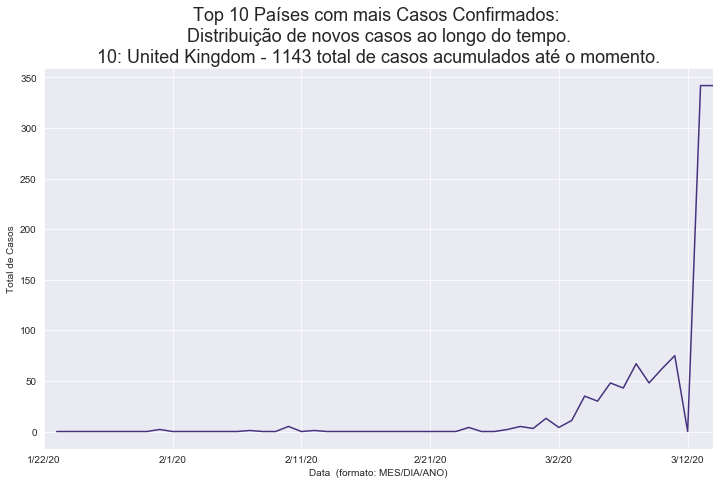

In [285]:
# Plota os graficos de cada país no top 10
for posicao, i in enumerate(top10):
    total = casos_confirmados.groupby('Country/Region')[data_atual_confirmados].sum().loc[i]
    plot_novos_casos_pais(casos_confirmados,
                          i,
                          'Top 10 Países com mais Casos Confirmados: \nDistribuição de novos casos ao longo do tempo.\n' 
                          + str(posicao+1) 
                          + ': ' + str(i)
                          + ' - ' + str(total) + ' total de casos acumulados até o momento.',
                          data_final=data_atual_confirmados)


# Análise das Mortes

## Top 10 Países com mais casos de mortes

In [286]:
top10_mortes = mortes_confirmadas.groupby('Country/Region')[data_atual_mortes].sum().sort_values(ascending=False)[:10].index

print('Total de mortes acumuladas:\n\n',mortes_confirmadas.groupby('Country/Region')[data_atual_mortes].sum().sort_values(ascending=False).head(20))

Total de mortes acumuladas:

 Country/Region
China             3193
Italy             1441
Iran               611
Spain              195
France              91
Korea, South        72
US                  54
Japan               22
United Kingdom      21
Switzerland         13
Netherlands         12
Iraq                10
Germany              9
Philippines          8
Cruise Ship          7
Indonesia            5
San Marino           5
Belgium              4
Poland               3
Norway               3
Name: 3/14/20, dtype: int64


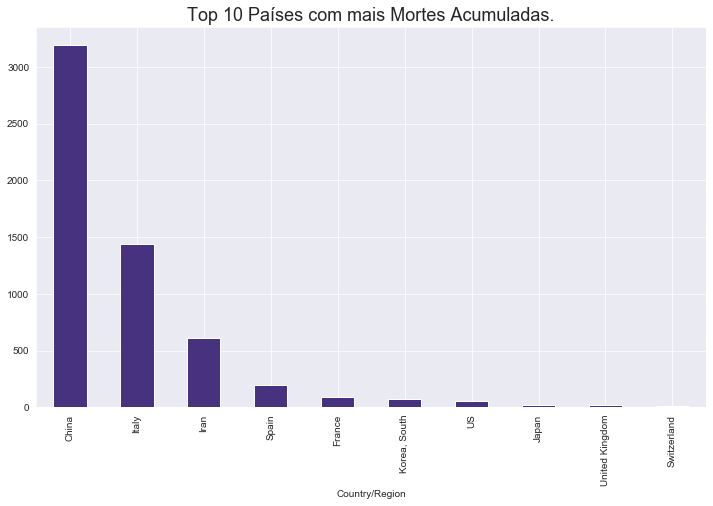

In [287]:
mortes_confirmadas.groupby('Country/Region')[data_atual_mortes].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Países com mais Mortes Acumuladas.', fontsize=18)
plt.show()

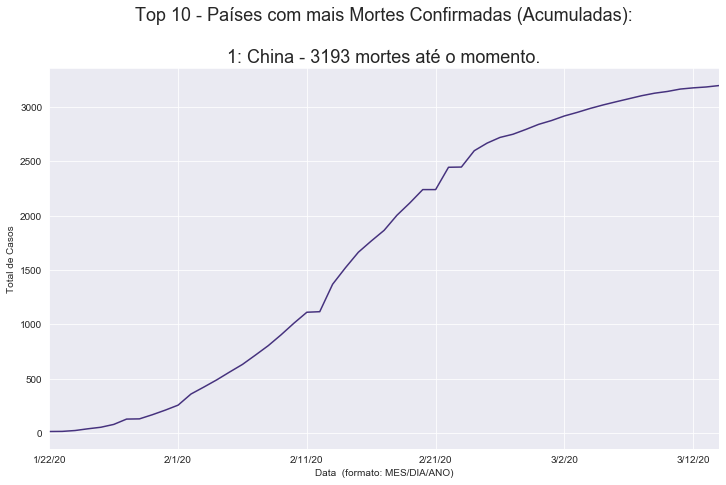

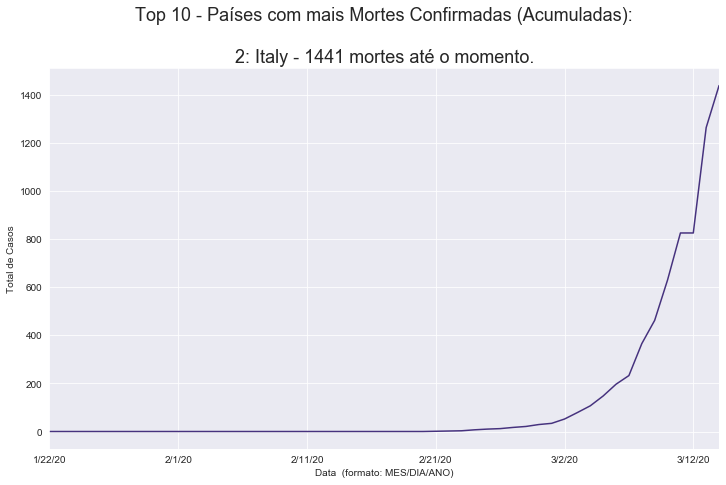

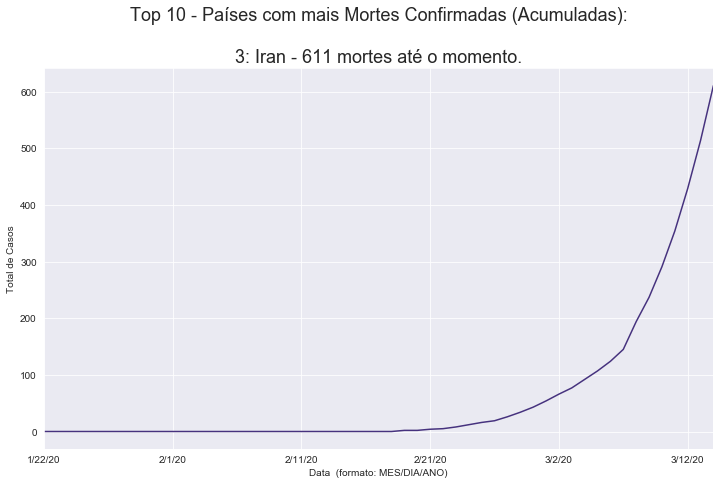

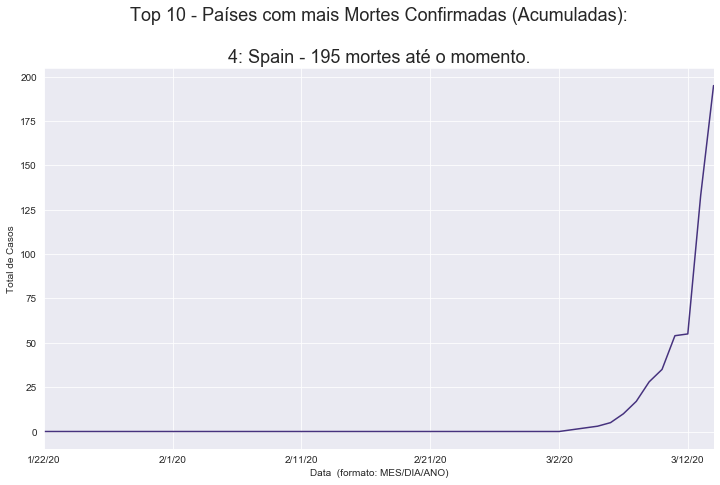

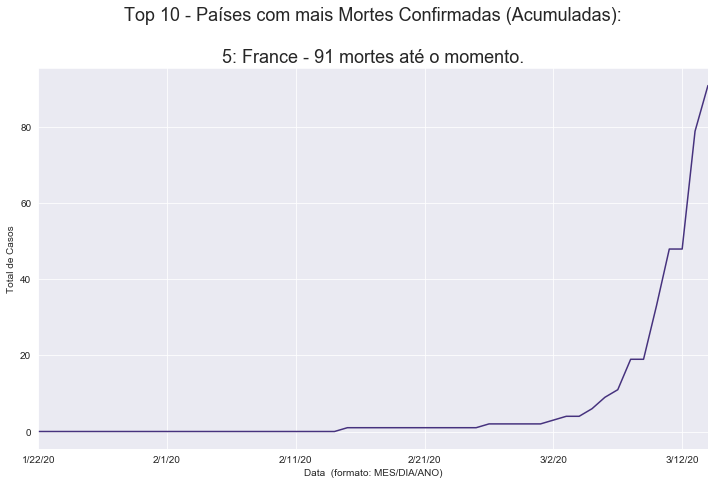

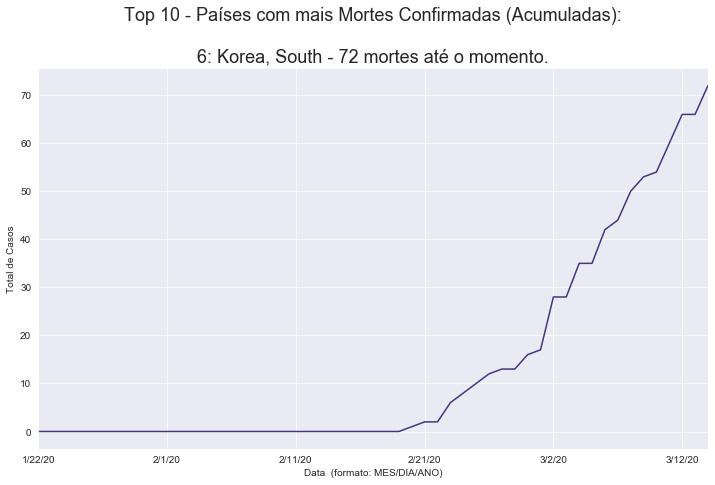

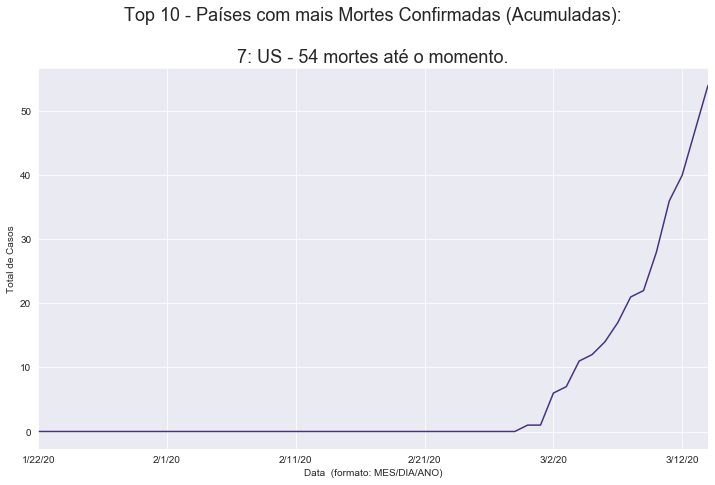

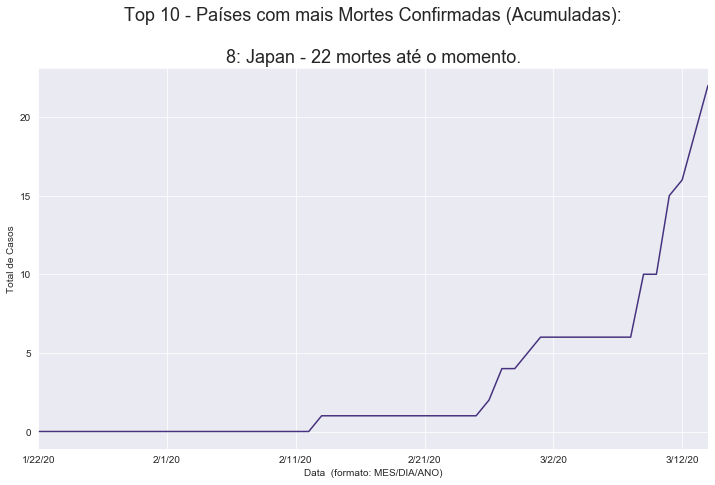

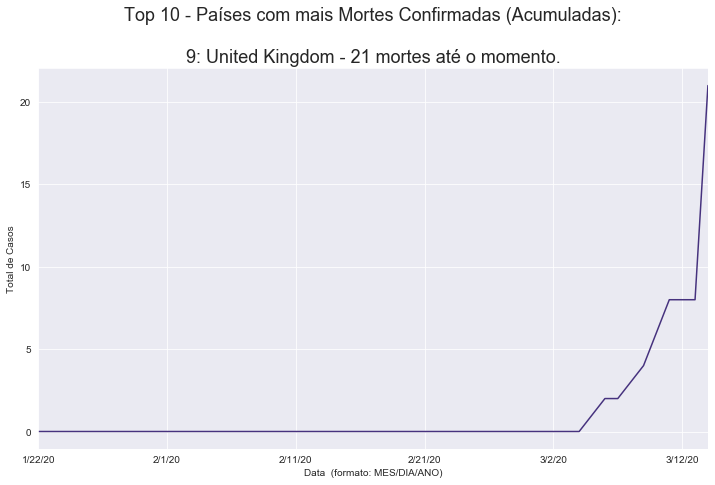

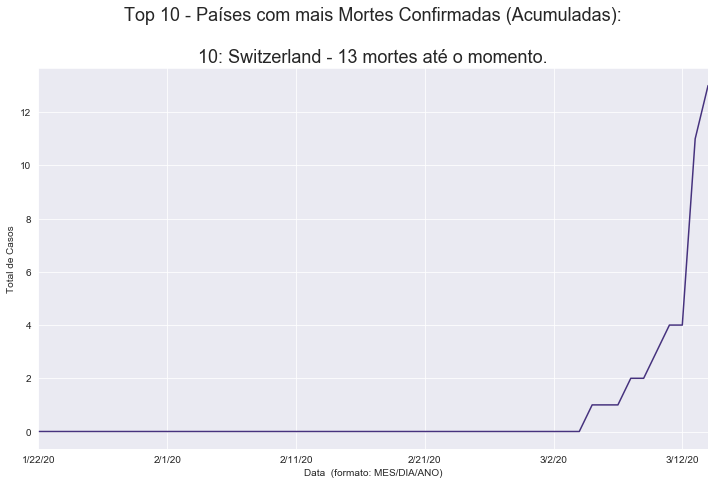

In [288]:
# Plota os graficos de cada país no top 10
for posicao, i in enumerate(top10_mortes):
    total = mortes_confirmadas.groupby('Country/Region')[data_atual_mortes].sum().loc[i]
    plot_total_casos_pais(mortes_confirmadas,
                          i,
                          'Top 10 - Países com mais Mortes Confirmadas (Acumuladas):\n\n' 
                          + str(posicao+1) 
                          + ': ' + str(i)
                          + ' - ' + str(total) + ' mortes até o momento.',
                          data_final=data_atual_confirmados)


# Distribuição das mortes ao longo do tempo.

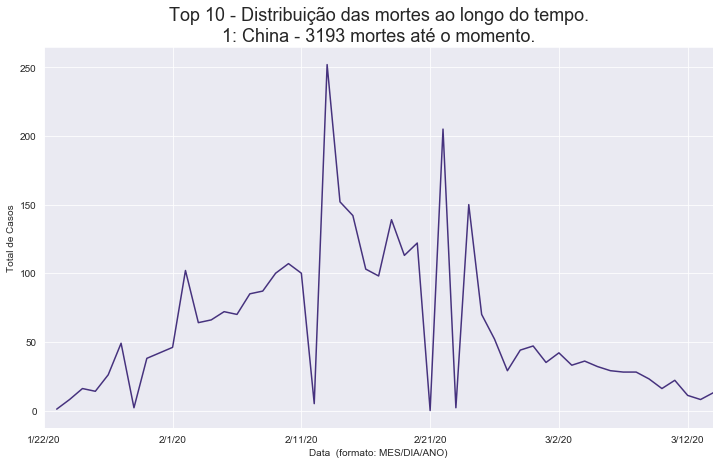

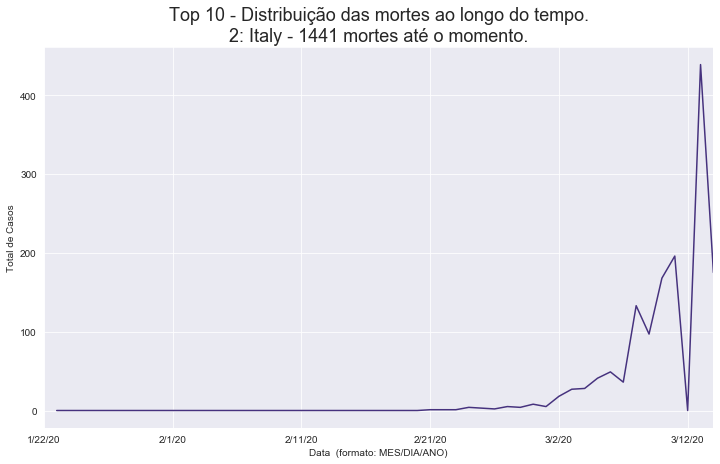

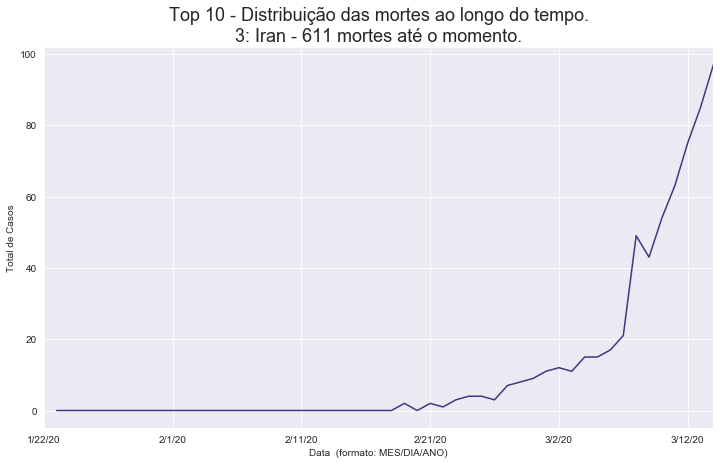

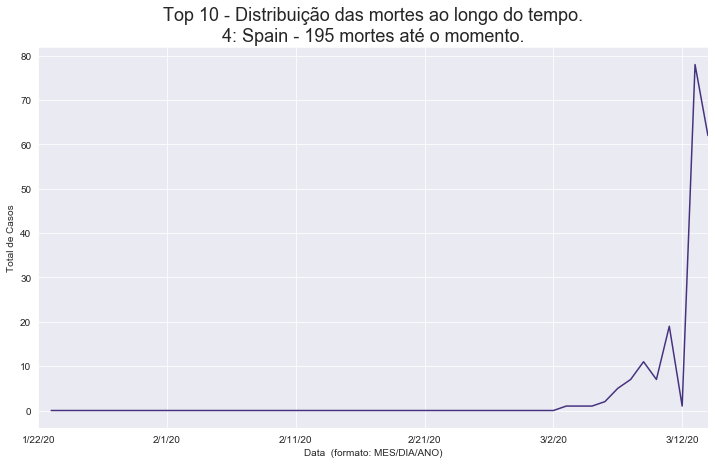

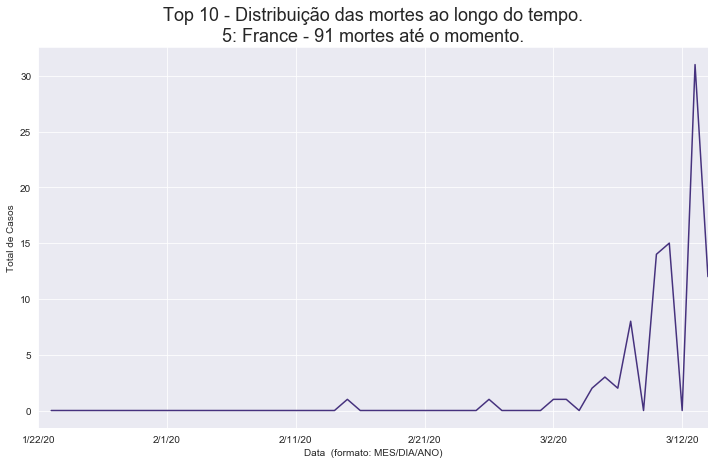

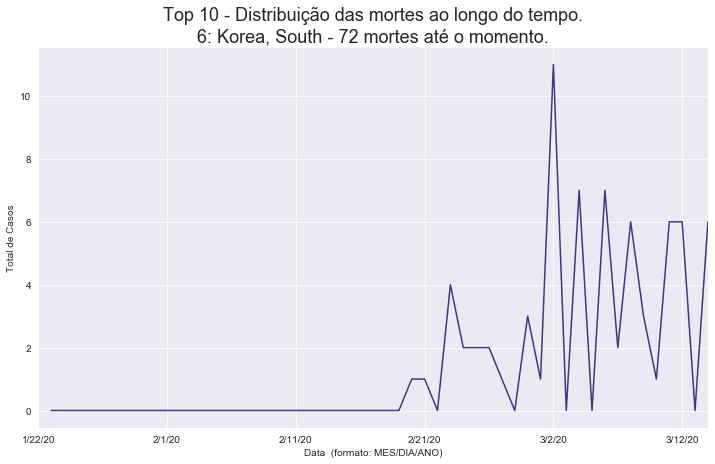

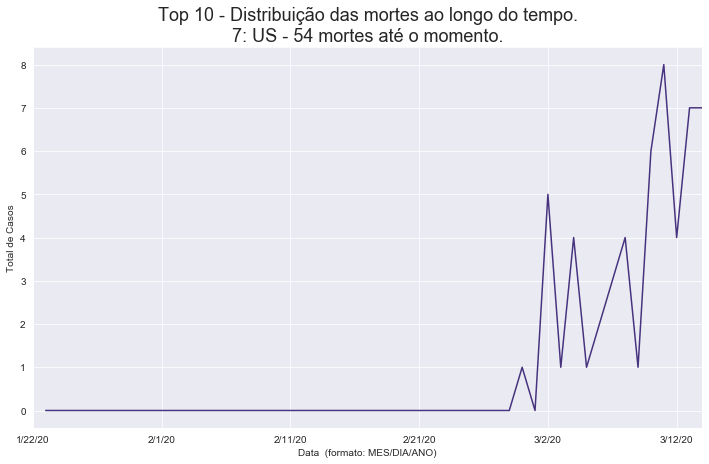

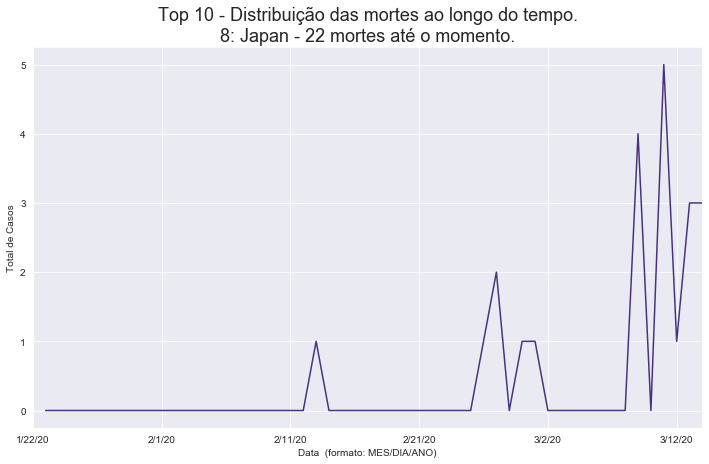

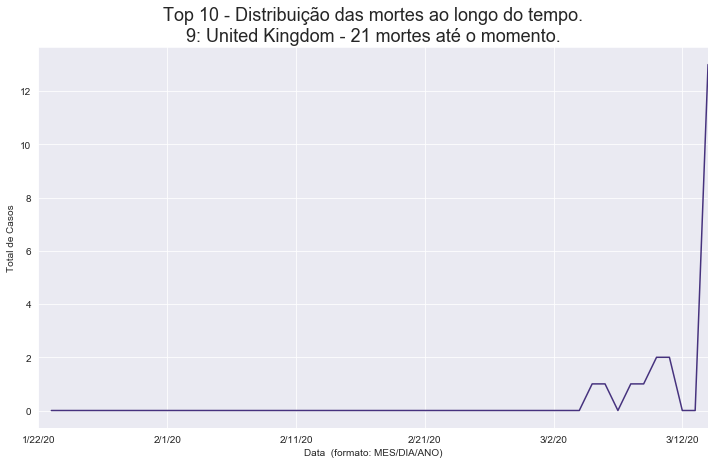

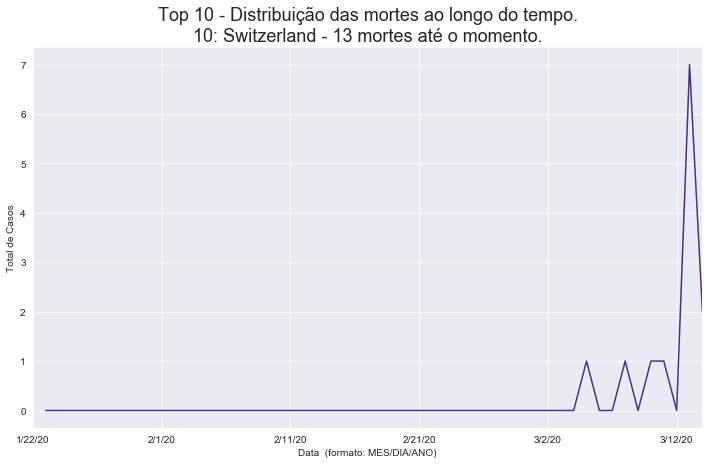

In [289]:
# Plota os graficos de cada país no top 10
for posicao, i in enumerate(top10_mortes):
    total = mortes_confirmadas.groupby('Country/Region')[data_atual_mortes].sum().loc[i]
    plot_novos_casos_pais(mortes_confirmadas,
                          i,
                          'Top 10 - Distribuição das mortes ao longo do tempo.\n' 
                          + str(posicao+1) 
                          + ': ' + str(i)
                          + ' - ' + str(total) + ' mortes até o momento.',
                          data_final=data_atual_mortes)


# Análise dos Casos Recuperados

## Top 10 Países com mais casos recuperados

In [290]:
top10_recuperados = casos_recuperados.groupby('Country/Region')[data_atual_recuperados].sum().sort_values(ascending=False)[:10].index

print('Total de Casos Recuperados:\n\n',casos_recuperados.groupby('Country/Region')[data_atual_recuperados].sum().sort_values(ascending=False).head(10))

Total de Casos Recuperados:

 Country/Region
China           65660
Iran             2959
Italy            1966
Spain             517
Korea, South      510
Cruise Ship       325
Japan             118
Singapore         105
Germany            46
Bahrain            44
Name: 3/14/20, dtype: int64


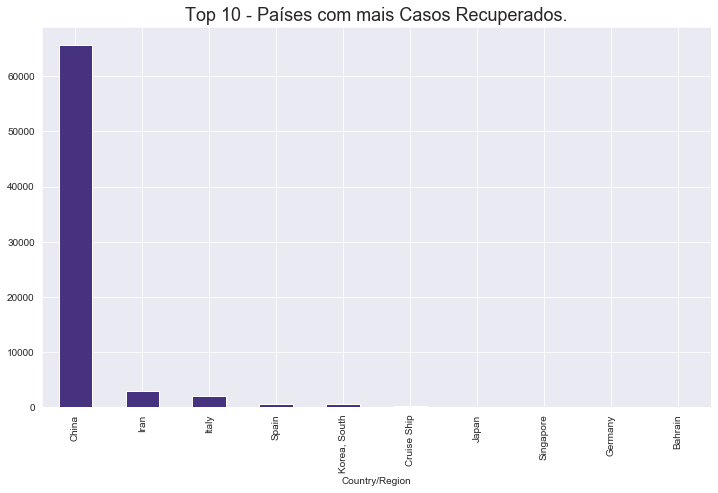

In [291]:
casos_recuperados.groupby('Country/Region')[data_atual_recuperados].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 - Países com mais Casos Recuperados.', fontsize=18)
plt.show()

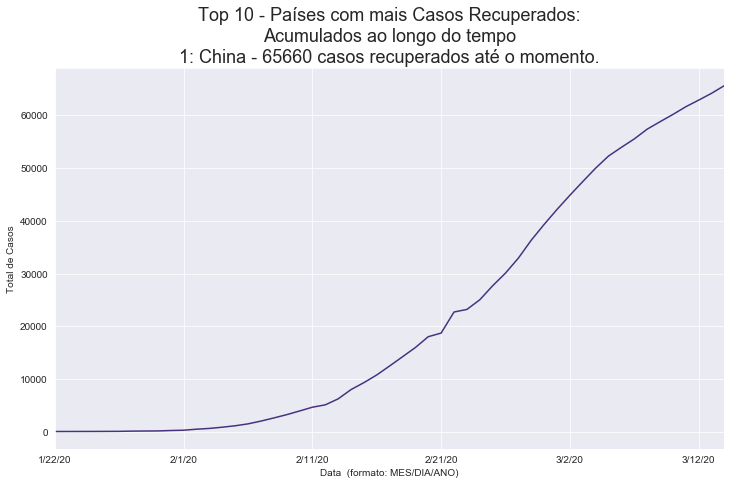

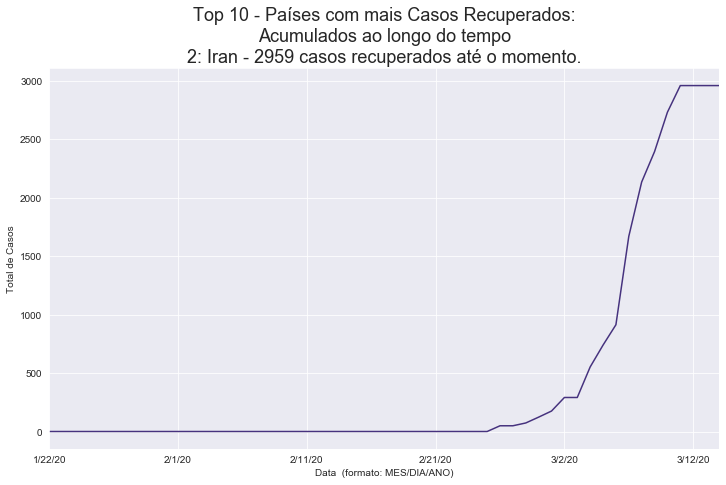

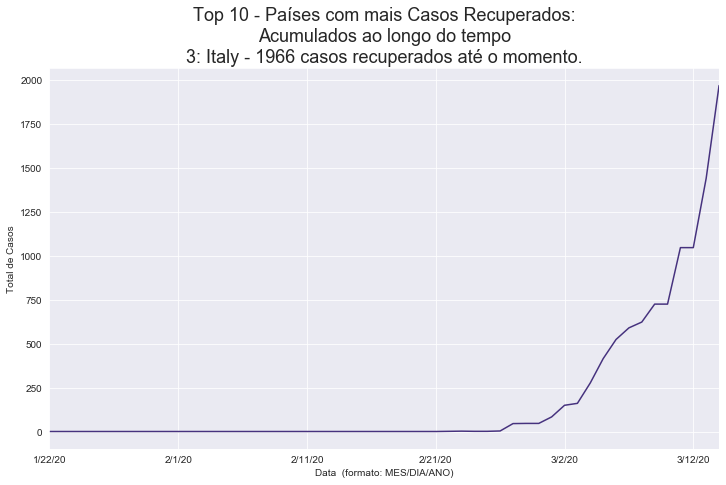

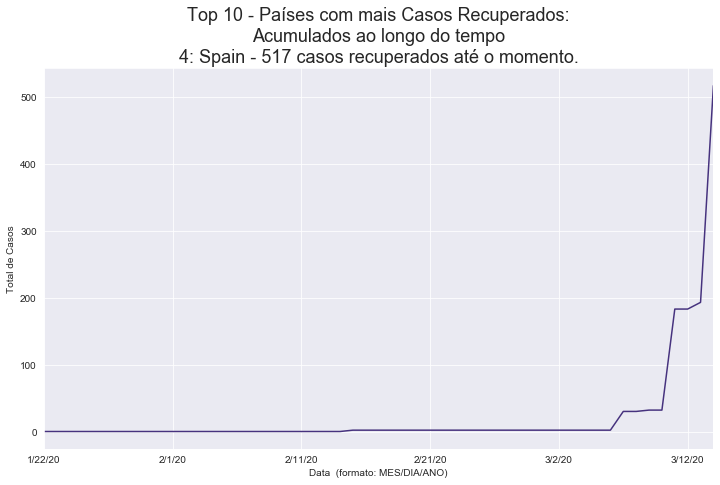

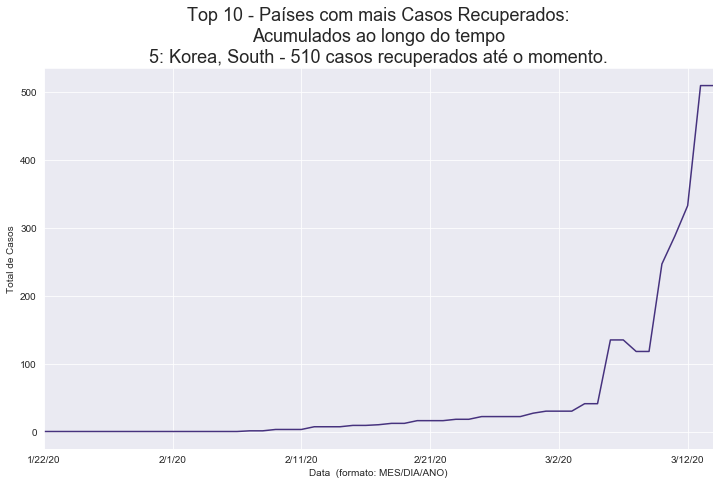

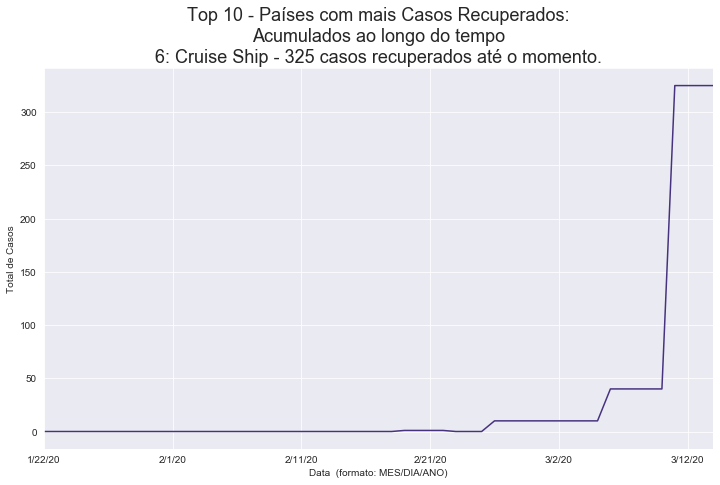

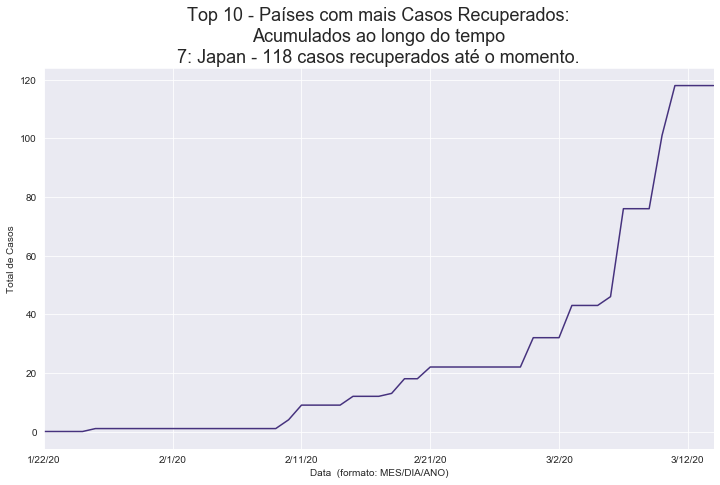

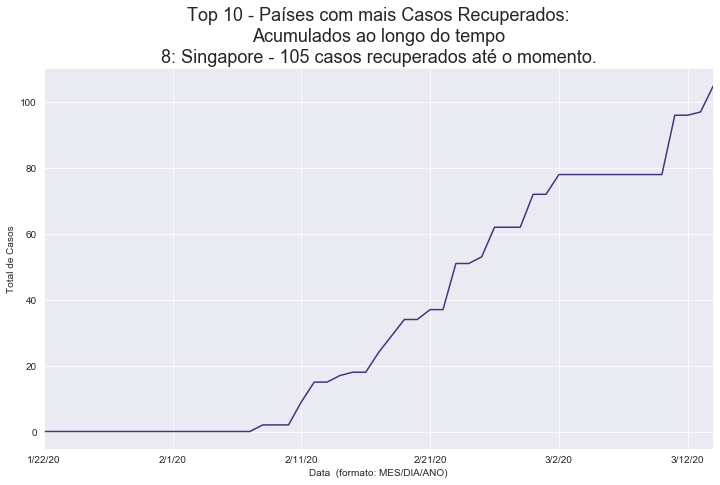

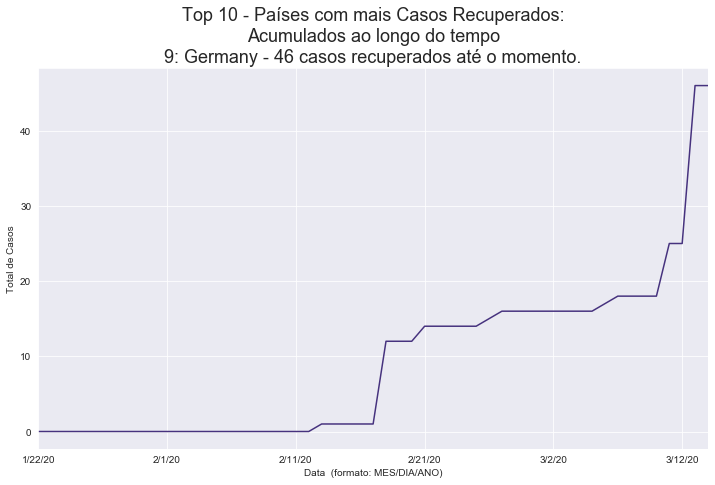

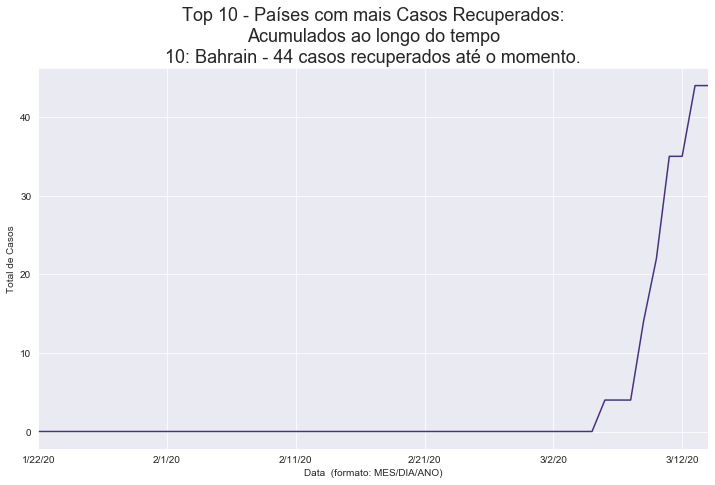

In [292]:
# Plota os graficos de cada país no top 10
for posicao, i in enumerate(top10_recuperados):
    total = casos_recuperados.groupby('Country/Region')[data_atual_recuperados].sum().loc[i]
    plot_total_casos_pais(casos_recuperados,
                          i,
                          'Top 10 - Países com mais Casos Recuperados:\nAcumulados ao longo do tempo\n' 
                          + str(posicao+1) 
                          + ': ' + str(i)
                          + ' - ' + str(total) + ' casos recuperados até o momento.',
                          data_final=data_atual_recuperados)


# Distribuição dos Casos Curados ao longo do tempo.

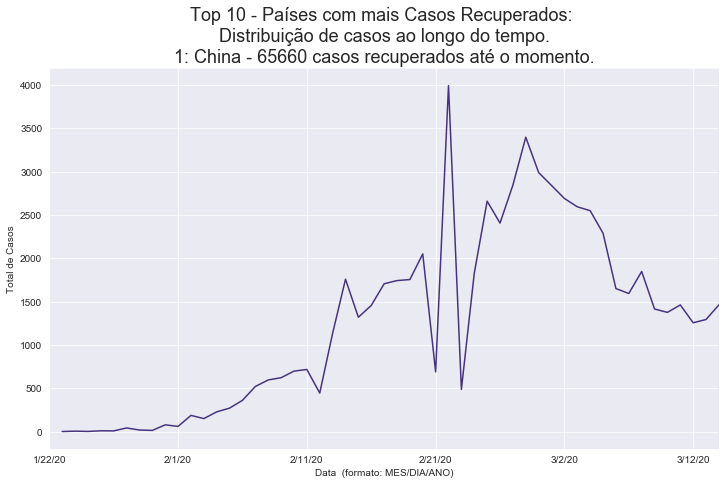

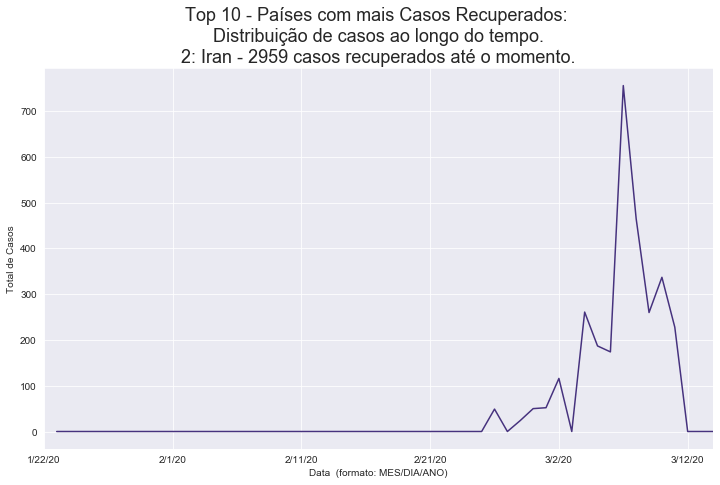

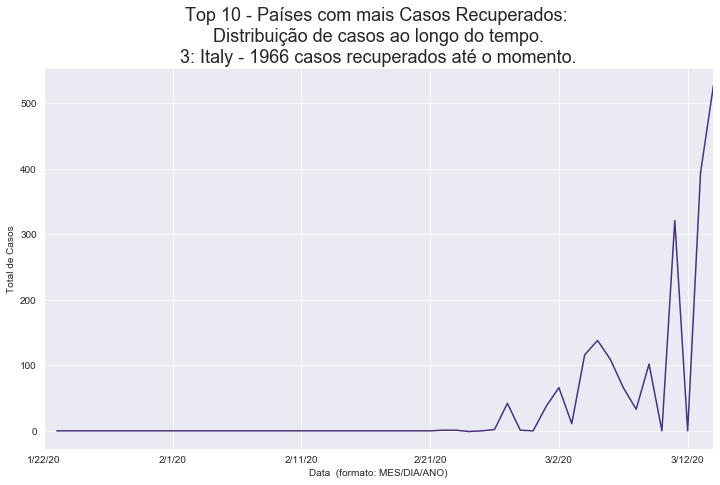

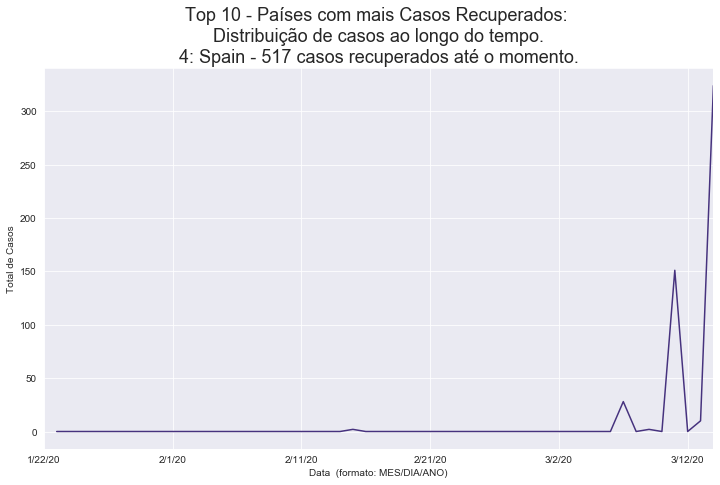

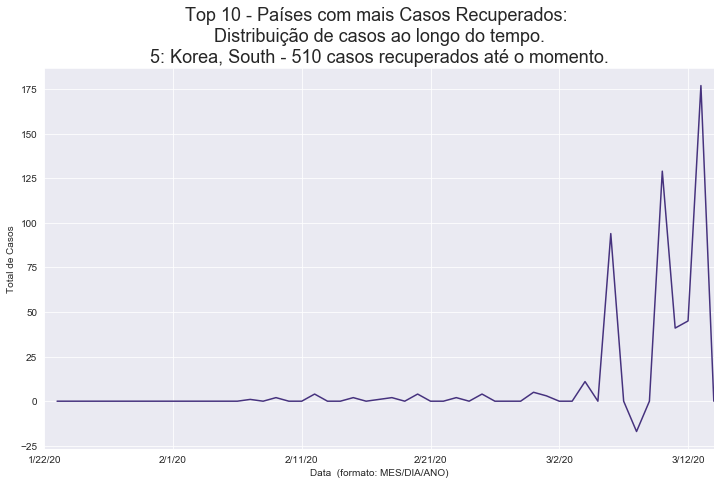

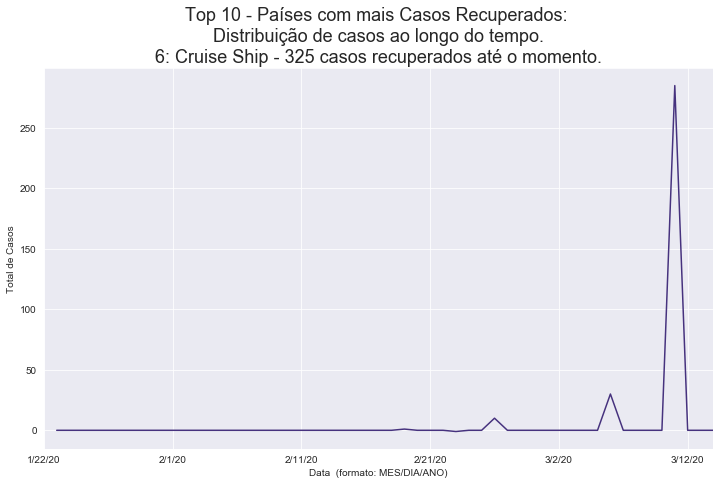

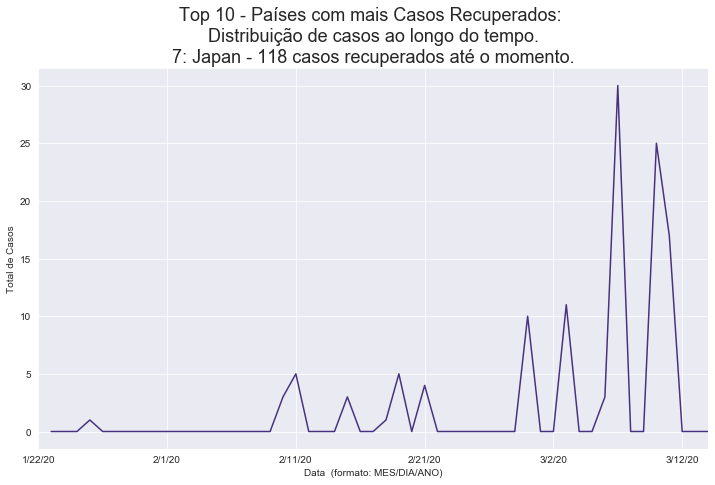

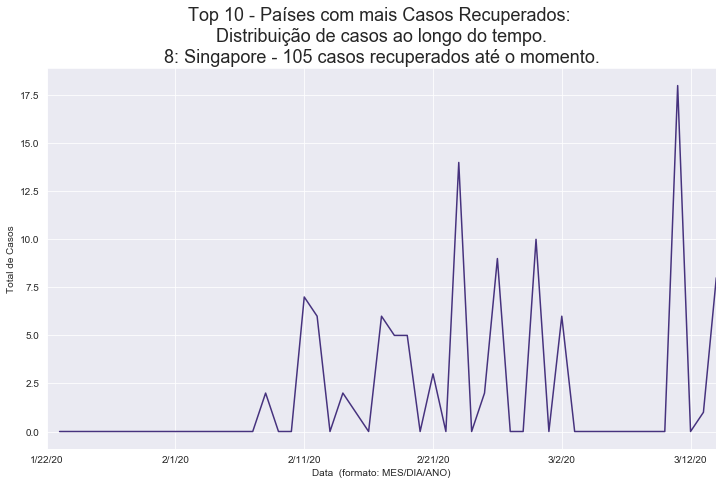

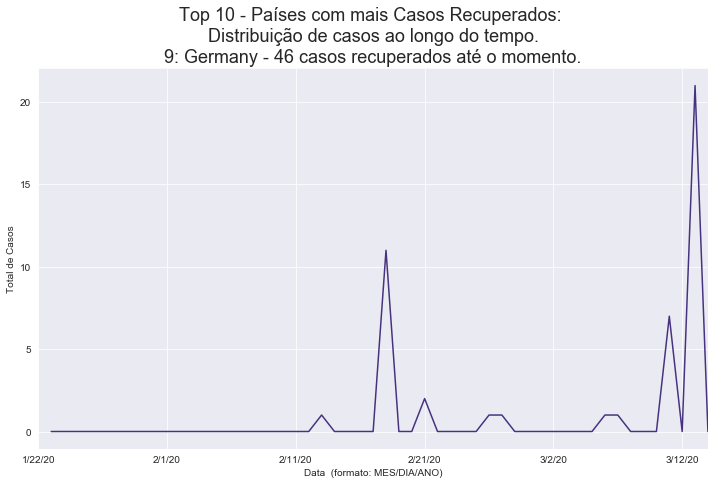

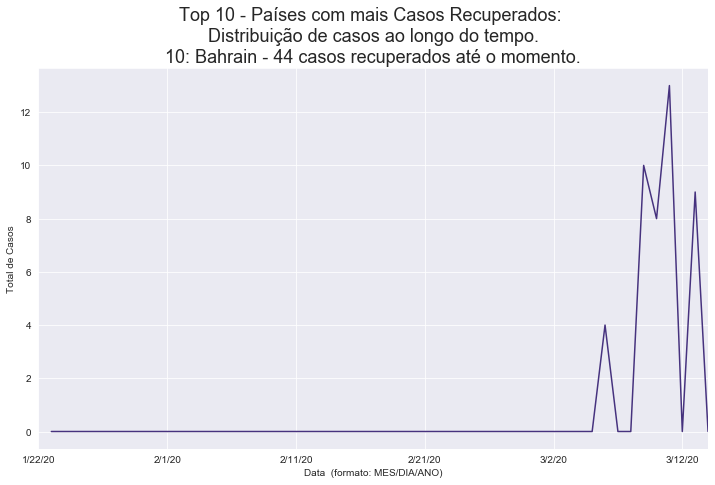

In [293]:
# Plota os graficos de cada país no top 10
for posicao, i in enumerate(top10_recuperados):
    total = casos_recuperados.groupby('Country/Region')[data_atual_recuperados].sum().loc[i]
    plot_novos_casos_pais(casos_recuperados,
                          i,
                          'Top 10 - Países com mais Casos Recuperados: \nDistribuição de casos ao longo do tempo.\n' 
                          + str(posicao+1) 
                          + ': ' + str(i)
                          + ' - ' + str(total) + ' casos recuperados até o momento.',
                          data_final=data_atual_recuperados)
